In [1]:

import os
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm, tnrange
from sklearn import metrics
from IPython.display import Image 
from sklearn.cross_validation import train_test_split


/Users/ivan/Desktop/ALL/Soft/python3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


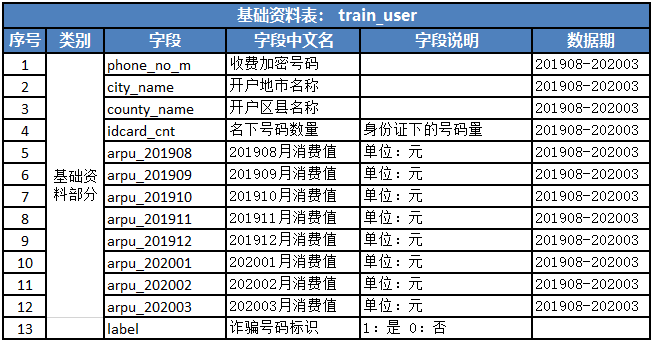

In [2]:
Image('img/1.png')  

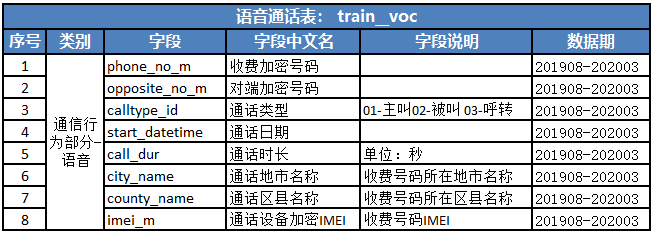

In [3]:
Image('img/2.png')

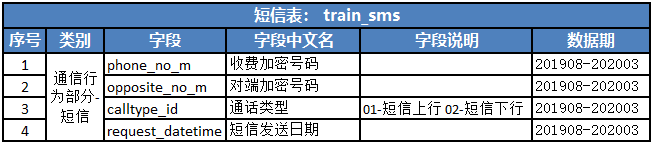

In [4]:
Image('img/3.png')

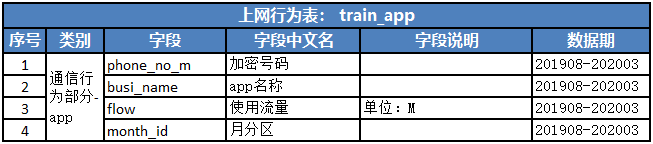

In [5]:
Image('img/4.png')

In [6]:
dt = "/Users/ivan/Desktop/ALL/Data/SCAutiFraud/0527/"

In [7]:
! ls -l "/Users/ivan/Desktop/ALL/Data/SCAutiFraud/0527/"

total 1168
-rwxr-xr-x@ 1 ivan  staff  267912  5 26 22:33 submit_example.csv
-rwxr-xr-x@ 1 ivan  staff  267912  6  7 13:22 submit_example0.csv
drwxr-xr-x@ 6 ivan  staff     192  5 25 16:41 test
drwxr-xr-x@ 6 ivan  staff     192  5 26 09:28 train


### 2020-03

In [8]:
mth = '2020-03'
month = mth.replace("-", "")

In [9]:
%time user = pd.read_csv(f"{dt}/train/train_user.csv")
user.fillna(-1, inplace=True)
user

CPU times: user 28.3 ms, sys: 7.25 ms, total: 35.6 ms
Wall time: 38.3 ms


,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,绵阳,江油分公司,1,46.06,45.00,45.00,45.00,45.00,45.00,45.00,45.00,0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,德阳,旌阳分公司,1,79.00,79.20,79.10,79.30,41.40,34.10,59.40,60.00,0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,成都,金堂分公司,2,18.85,24.45,22.00,21.40,22.15,21.10,61.30,63.00,0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,成都,高新分公司,2,19.20,29.65,130.40,173.12,19.00,19.00,19.00,23.20,0
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,德阳,旌阳分公司,1,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,0
5,16de3bcbd05ae39e8a553a8959d2ef6e31d9eaf34c5643...,达州,宣汉县分公司,2,65.55,94.45,59.00,65.87,59.00,59.00,59.00,59.65,0
6,a19e29d2dfcf631a412c9dfd0a14f0d79ec6d784168a84...,成都,郫都分公司,1,-1.00,-1.00,-1.00,10.49,45.50,46.60,-1.00,-1.00,1
7,7b6b79beebb15203f984eb1b4232581151cfe633037c64...,乐山,犍为分公司,4,-1.00,-1.00,-1.00,-1.00,40.34,-1.00,-1.00,-1.00,1
8,371bb6ef7f0973e9aa4a2a324d98d326efdc903730bea9...,德阳,罗江分公司,2,29.89,17.64,14.47,15.77,25.34,9.50,9.00,16.22,1
9,c7c8f04a35e800c615301288bdbe6500993f87dc282025...,成都,双流分公司,2,21.67,29.82,36.37,20.59,15.97,23.84,15.24,14.63,0


In [10]:
pd.value_counts(user.label)

0    4144
1    1962
Name: label, dtype: int64

In [11]:
user["v001"] = user["idcard_cnt"].apply(lambda x: 1 if x >= 3 or x == 0 else 0)
user["v002"] = user["city_name"].apply(lambda x: 1 if x == -1 else 0)

# NEW.
user["v003"] = user[f"arpu_{month}"].apply(lambda x: 1 if x == -1 else 0)
# NEW.

user[["phone_no_m", "label", "v001", "v002", "v003"]].head(10)


,phone_no_m,label,v001,v002,v003
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,0,0,0,0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,0,0,0,0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,0,0,0,0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,0,0,0,0
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,0,0,0,0
5,16de3bcbd05ae39e8a553a8959d2ef6e31d9eaf34c5643...,0,0,0,0
6,a19e29d2dfcf631a412c9dfd0a14f0d79ec6d784168a84...,1,0,0,1
7,7b6b79beebb15203f984eb1b4232581151cfe633037c64...,1,1,0,1
8,371bb6ef7f0973e9aa4a2a324d98d326efdc903730bea9...,1,0,0,0
9,c7c8f04a35e800c615301288bdbe6500993f87dc282025...,0,0,0,0


---

In [12]:
%time voc = pd.read_csv(f"{dt}/train/train_voc.csv", nrows=5)
voc

CPU times: user 2.83 ms, sys: 2.08 ms, total: 4.91 ms
Wall time: 4 ms


,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m
0,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:16:25,13,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...
1,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:36:20,16,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...
2,ecd1b3f5a38576ef9872d1cb7a762f31869153de736e7a...,c386d11d5203136e924e070afcac734cdaea6691472e84...,1,2019-08-28 09:46:50,18,NaN,NaN,071e8dcb4010c643c48339cb8abf4a69e03b37afade98d...
3,41a97bdfe77f3210deba78689baecb110922878be2f14c...,79ef199a532bcb9a89990d0996cee3d40557f06b9e5265...,1,2019-09-18 16:19:20,34,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...
4,41a97bdfe77f3210deba78689baecb110922878be2f14c...,e273542129cf7fa37c28d3f4c95b7b9e8bcb561bbabc50...,2,2019-09-18 16:18:46,23,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...


In [13]:
vocl = []

n = 0
with open(f"{dt}/train/train_voc.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            vocl.append(i.split(","))
        
        n += 1

vocm = pd.DataFrame(vocl, columns=voc.columns)
%time vocm["start_dt"] = vocm["start_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
%time vocm["Hour"] = vocm["start_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour)
vocm["kcall_dur"] = vocm["call_dur"].apply(lambda x: int(x))
vocm["k"] = 1
vocm.head()


5015431it [00:10, 460894.77it/s]


CPU times: user 6.67 s, sys: 73.4 ms, total: 6.74 s
Wall time: 6.87 s
CPU times: user 6.12 s, sys: 33.7 ms, total: 6.15 s
Wall time: 6.21 s


,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,start_dt,Hour,kcall_dur,k
0,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18...,1b01124a6ad0443ad868757c6594a605a0c5179c2b5b57...,1,2020-03-22 21:38:40,175,,,90ba61111dad175330029e10da8264a86dfdb3a281ccb8...,2020-03-22 21:38:40,21,175,1
1,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18...,1b01124a6ad0443ad868757c6594a605a0c5179c2b5b57...,1,2020-03-23 18:05:41,33,,,90ba61111dad175330029e10da8264a86dfdb3a281ccb8...,2020-03-23 18:05:41,18,33,1
2,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4...,f1b73c46a691c068bfd38253e20e882d4993c8d3e58016...,1,2020-03-01 11:24:37,39,,,e1e1149b2c06e9972293c457293abb32ad05b0c82b3b64...,2020-03-01 11:24:37,11,39,1
3,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4...,5bc6d97a3017578edfa7979fa43653cd74bad827f18337...,1,2020-03-01 11:23:44,32,,,e1e1149b2c06e9972293c457293abb32ad05b0c82b3b64...,2020-03-01 11:23:44,11,32,1
4,2bdbc0a45d6228970b353d691e2ec229f0cf60790a1a39...,c42eeddeff98feb87860441ea6548f8bda2a080c935e02...,2,2020-03-03 15:34:21,3,,,3e808a14fa2aa61524c70f262539d1c8532b8e3a8c7c87...,2020-03-03 15:34:21,15,3,1


In [14]:
_1 = vocm[["phone_no_m", "start_dt"]].copy()
_1.sort_values(by=["phone_no_m", "start_dt"], inplace=True)
%time _1["start_dt1"] = _1[["phone_no_m", "start_dt"]].groupby("phone_no_m").shift()
%time _1["start_dtd"] = [(i-j).seconds for i, j in zip(_1["start_dt"], _1["start_dt1"])]
_1.head()


CPU times: user 297 ms, sys: 12.4 ms, total: 309 ms
Wall time: 311 ms
CPU times: user 14.1 s, sys: 164 ms, total: 14.3 s
Wall time: 14.5 s


,phone_no_m,start_dt,start_dt1,start_dtd
558792,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2020-03-01 14:28:11,NaT,NaN
558793,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2020-03-01 15:42:51,2020-03-01 14:28:11,4480.0
195327,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2020-03-04 12:50:07,2020-03-01 15:42:51,76036.0
356667,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2020-03-06 21:33:11,2020-03-04 12:50:07,31384.0
356666,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2020-03-06 21:33:43,2020-03-06 21:33:11,32.0


In [15]:
%time vocm0 = vocm[["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm0.reset_index(inplace=True)
vocm0.rename({"k": "v004_Ak", "kcall_dur": "v005_Acall"}, inplace=True, axis=1)
# vocm0

%time vocm1 = vocm[vocm["calltype_id"] == "1"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm1.reset_index(inplace=True)
vocm1.rename({"k": "v006_1k", "kcall_dur": "v007_1call"}, inplace=True, axis=1)
# vocm1

%time vocm2 = vocm[vocm["calltype_id"] == "2"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm2.reset_index(inplace=True)
vocm2.rename({"k": "v008_2k", "kcall_dur": "v009_2call"}, inplace=True, axis=1)
# vocm2

%time vocm3 = vocm[vocm["calltype_id"] == "3"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm3.reset_index(inplace=True)
vocm3.rename({"k": "v010_3k", "kcall_dur": "v011_3call"}, inplace=True, axis=1)
# vocm3


# NEW.
%time vocm4 = vocm[vocm["Hour"].isin([0,1,2,3,4,5,6])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm4.reset_index(inplace=True)
vocm4.rename({"k": "v062_h0006", "kcall_dur":"v063_call"}, inplace=True, axis=1)
# vocm4

%time vocm5 = vocm[vocm["Hour"].isin([7,8,9,10,11,12])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm5.reset_index(inplace=True)
vocm5.rename({"k": "v064_h0712", "kcall_dur":"v065_call"}, inplace=True, axis=1)
# vocm5

%time vocm6 = vocm[vocm["Hour"].isin([13,14,15,16,17,18])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm6.reset_index(inplace=True)
vocm6.rename({"k": "v066_h1318", "kcall_dur":"v067_call"}, inplace=True, axis=1)
# vocm6

%time vocm7 = vocm[vocm["Hour"].isin([19,20,21,22,23])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm7.reset_index(inplace=True)
vocm7.rename({"k": "v068_h1923", "kcall_dur":"v069_call"}, inplace=True, axis=1)
# vocm7


%time vocm8 = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm8.reset_index(inplace=True)
vocm8.rename({"k": "v070_h0006", "kcall_dur":"v071_call"}, inplace=True, axis=1)
# vocm8

%time vocm9 = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm9.reset_index(inplace=True)
vocm9.rename({"k": "v072_h0712", "kcall_dur":"v073_call"}, inplace=True, axis=1)
# vocm9

%time vocmA = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmA.reset_index(inplace=True)
vocmA.rename({"k": "v074_h1318", "kcall_dur":"v075_call"}, inplace=True, axis=1)
# vocmA

%time vocmB = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmB.reset_index(inplace=True)
vocmB.rename({"k": "v076_h1923", "kcall_dur":"v077_call"}, inplace=True, axis=1)
# vocmB


%time vocmC = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmC.reset_index(inplace=True)
vocmC.rename({"k": "v078_h0006", "kcall_dur":"v079_call"}, inplace=True, axis=1)
# vocmC

%time vocmD = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmD.reset_index(inplace=True)
vocmD.rename({"k": "v080_h0712", "kcall_dur":"v081_call"}, inplace=True, axis=1)
# vocmD

%time vocmE = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmE.reset_index(inplace=True)
vocmE.rename({"k": "v082_h1318", "kcall_dur":"v083_call"}, inplace=True, axis=1)
# vocmE

%time vocmF = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmF.reset_index(inplace=True)
vocmF.rename({"k": "v084_h1923", "kcall_dur":"v085_call"}, inplace=True, axis=1)
# vocmF


%time vocmG = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmG.reset_index(inplace=True)
vocmG.rename({"k": "v086_h0006", "kcall_dur":"v087_call"}, inplace=True, axis=1)
# vocmG

%time vocmH = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmH.reset_index(inplace=True)
vocmH.rename({"k": "v088_h0712", "kcall_dur":"v089_call"}, inplace=True, axis=1)
# vocmH

%time vocmI = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmI.reset_index(inplace=True)
vocmI.rename({"k": "v090_h1318", "kcall_dur":"v091_call"}, inplace=True, axis=1)
# vocmI

%time vocmJ = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmJ.reset_index(inplace=True)
vocmJ.rename({"k": "v092_h1923", "kcall_dur":"v093_call"}, inplace=True, axis=1)
# vocmJ

%time vocmK = _1[["phone_no_m", "start_dtd"]].groupby("phone_no_m").min()
vocmK.reset_index(inplace=True)
vocmK.rename({"start_dtd": "v094_start_dtd"}, inplace=True, axis=1)
# vocmK

%time vocmL = _1[["phone_no_m", "start_dtd"]].groupby("phone_no_m").max()
vocmL.reset_index(inplace=True)
vocmL.rename({"start_dtd": "v095_start_dtd"}, inplace=True, axis=1)
# vocmL

# NEW.



CPU times: user 317 ms, sys: 21.8 ms, total: 339 ms
Wall time: 347 ms
CPU times: user 398 ms, sys: 11.8 ms, total: 410 ms
Wall time: 410 ms
CPU times: user 227 ms, sys: 8.28 ms, total: 235 ms
Wall time: 242 ms
CPU times: user 54.6 ms, sys: 628 µs, total: 55.3 ms
Wall time: 56 ms
CPU times: user 26.2 ms, sys: 328 µs, total: 26.6 ms
Wall time: 26.5 ms
CPU times: user 195 ms, sys: 8.68 ms, total: 204 ms
Wall time: 205 ms
CPU times: user 245 ms, sys: 10.8 ms, total: 255 ms
Wall time: 258 ms
CPU times: user 114 ms, sys: 1.18 ms, total: 115 ms
Wall time: 116 ms
CPU times: user 70.8 ms, sys: 1.19 ms, total: 72 ms
Wall time: 72.3 ms
CPU times: user 182 ms, sys: 3.35 ms, total: 186 ms
Wall time: 189 ms
CPU times: user 191 ms, sys: 3.09 ms, total: 194 ms
Wall time: 195 ms
CPU times: user 102 ms, sys: 380 µs, total: 102 ms
Wall time: 101 ms
CPU times: user 63.5 ms, sys: 307 µs, total: 63.8 ms
Wall time: 63.7 ms
CPU times: user 131 ms, sys: 1.01 ms, total: 132 ms
Wall time: 134 ms
CPU times: user 

---

In [16]:
%time sms = pd.read_csv(f"{dt}/train/train_sms.csv", nrows=5)
sms


CPU times: user 2.79 ms, sys: 1.2 ms, total: 3.99 ms
Wall time: 2.98 ms


,phone_no_m,opposite_no_m,calltype_id,request_datetime
0,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
1,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
2,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
3,296cfae1d838070c4dd05a125a85c3d29bbb95f713c2ea...,1205bb229d750a6bcb3f9c33893b5d68c8fc8a6443b0a7...,2,2019-08-01 17:46:44
4,39de6ef3a87b8e660e42496450c54b731f3621ca708944...,972affd4be9e7596420379b7e7910843759cdfbd81315e...,2,2019-08-01 16:46:30


In [17]:
smsl = []

n = 0
with open(f"{dt}/train/train_sms.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            smsl.append(i.split(","))
        
        n += 1

smsm = pd.DataFrame(smsl, columns=sms.columns)
%time smsm["Hour"] = smsm["request_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour)
smsm["k"] = 1
smsm.head()


6848510it [00:09, 723669.88it/s] 


CPU times: user 7.41 s, sys: 19.4 ms, total: 7.43 s
Wall time: 7.46 s


,phone_no_m,opposite_no_m,calltype_id,request_datetime,Hour,k
0,3c4adabd6c1eb2774054cdc67e8d1df09f89f4fd0b44fa...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 10:19:12,10,1
1,3c4adabd6c1eb2774054cdc67e8d1df09f89f4fd0b44fa...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 10:19:12,10,1
2,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,14,1
3,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,14,1
4,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,14,1


In [18]:
%time smsm0 = smsm[["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm0.reset_index(inplace=True)
smsm0.rename({"k": "v012_Ak"}, inplace=True, axis=1)
# smsm0

%time smsm1 = smsm[smsm["calltype_id"] == "1"][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm1.reset_index(inplace=True)
smsm1.rename({"k": "v013_1k"}, inplace=True, axis=1)
# smsm1

%time smsm2 = smsm[smsm["calltype_id"] == "2"][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm2.reset_index(inplace=True)
smsm2.rename({"k": "v014_2k"}, inplace=True, axis=1)
# smsm2


# NEW.
%time smsm3 = smsm[smsm["Hour"].isin([0,1,2,3,4,5,6])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm3.reset_index(inplace=True)
smsm3.rename({"k": "v050_h0006"}, inplace=True, axis=1)
# smsm3

%time smsm4 = smsm[smsm["Hour"].isin([7,8,9,10,11,12])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm4.reset_index(inplace=True)
smsm4.rename({"k": "v051_h0712"}, inplace=True, axis=1)
# smsm4

%time smsm5 = smsm[smsm["Hour"].isin([13,14,15,16,17,18])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm5.reset_index(inplace=True)
smsm5.rename({"k": "v052_h1318"}, inplace=True, axis=1)
# smsm5

%time smsm6 = smsm[smsm["Hour"].isin([19,20,21,22,23])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm6.reset_index(inplace=True)
smsm6.rename({"k": "v053_h1923"}, inplace=True, axis=1)
# smsm6


%time smsm7 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm7.reset_index(inplace=True)
smsm7.rename({"k": "v054_1h0006"}, inplace=True, axis=1)
# smsm7

%time smsm8 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm8.reset_index(inplace=True)
smsm8.rename({"k": "v055_1h0712"}, inplace=True, axis=1)
# smsm8

%time smsm9 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm9.reset_index(inplace=True)
smsm9.rename({"k": "v056_1h1318"}, inplace=True, axis=1)
# smsm9

%time smsmA = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmA.reset_index(inplace=True)
smsmA.rename({"k": "v057_1h1923"}, inplace=True, axis=1)
# smsmA


%time smsmB = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmB.reset_index(inplace=True)
smsmB.rename({"k": "v058_2h0006"}, inplace=True, axis=1)
# smsmB

%time smsmC = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmC.reset_index(inplace=True)
smsmC.rename({"k": "v059_2h0712"}, inplace=True, axis=1)
# smsmC

%time smsmD = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmD.reset_index(inplace=True)
smsmD.rename({"k": "v060_2h1318"}, inplace=True, axis=1)
# smsmD

%time smsmE = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmE.reset_index(inplace=True)
smsmE.rename({"k": "v061_2h1923"}, inplace=True, axis=1)
# smsmE
# NEW.


CPU times: user 239 ms, sys: 13.4 ms, total: 253 ms
Wall time: 251 ms
CPU times: user 101 ms, sys: 399 µs, total: 101 ms
Wall time: 101 ms
CPU times: user 336 ms, sys: 20.7 ms, total: 357 ms
Wall time: 357 ms
CPU times: user 25.3 ms, sys: 173 µs, total: 25.5 ms
Wall time: 25.1 ms
CPU times: user 184 ms, sys: 8.22 ms, total: 192 ms
Wall time: 192 ms
CPU times: user 178 ms, sys: 5.35 ms, total: 183 ms
Wall time: 197 ms
CPU times: user 92.2 ms, sys: 1.32 ms, total: 93.5 ms
Wall time: 107 ms
CPU times: user 76 ms, sys: 281 µs, total: 76.3 ms
Wall time: 76 ms
CPU times: user 83.1 ms, sys: 3.52 ms, total: 86.7 ms
Wall time: 99.3 ms
CPU times: user 95.4 ms, sys: 3.07 ms, total: 98.5 ms
Wall time: 97.8 ms
CPU times: user 72.4 ms, sys: 181 µs, total: 72.6 ms
Wall time: 72.2 ms
CPU times: user 63.6 ms, sys: 846 µs, total: 64.4 ms
Wall time: 64.5 ms
CPU times: user 225 ms, sys: 3.9 ms, total: 229 ms
Wall time: 228 ms
CPU times: user 230 ms, sys: 4.01 ms, total: 234 ms
Wall time: 245 ms
CPU times:

---

In [19]:
%time app = pd.read_csv(f"{dt}/train/train_app.csv", nrows=5)
app

CPU times: user 2.42 ms, sys: 1.17 ms, total: 3.59 ms
Wall time: 2.64 ms


,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.000000,NaN
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.000000,NaN
2,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,NaN,0.021529,2019-12
3,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,微信,0.001846,2019-12
4,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,高德导航,0.002288,2019-12


In [20]:
appl = []

n = 0
with open(f"{dt}/train/train_app.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            appl.append(i.split(","))
        
        n += 1

appm = pd.DataFrame(appl, columns=app.columns)
appm["k"] = 1 
appm["kflow"] = appm["flow"].apply(lambda x: float(x))
appm.head()


3283603it [00:04, 751843.74it/s]


,phone_no_m,busi_name,flow,month_id,k,kflow
0,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,,125.06060409545898,2020-03,1,125.060604
1,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,QQ,7.247597694396973,2020-03,1,7.247598
2,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,旺信,0.008340835571289062,2020-03,1,0.008341
3,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,微信,584.0278205871583,2020-03,1,584.027821
4,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,起点读书,5.342432022094727,2020-03,1,5.342432


In [21]:
pd.value_counts(appm.busi_name)

                    14733
DNS                  5992
微信                   5077
腾讯网                  4677
QQ                   4172
高德导航                 3917
手机百度                 3775
淘宝                   3771
腾讯新闻                 3728
今日头条                 3520
网页浏览                 3455
百度地图                 3345
网易网                  3265
腾讯地图                 3088
HTTPS                3062
支付宝                  2932
QQ浏览器                2925
腾讯视频                 2858
NTP                  2839
SSL                  2818
旺信                   2722
阿里云                  2686
友盟+                  2683
腾讯软件中心               2622
YouTube视频            2524
qq空间                 2523
谷歌应用                 2497
中国移动账户管理中心和通行证门户     2488
阿里巴巴服务               2424
抖音                   2421
                    ...  
Wondershare             1
护宝贝                     1
Genieesspv              1
烽火                      1
Caibawang               1
Dajiang                 1
淘券券                     1
Ares        

In [22]:

# print("-"*100)
# rkv = {}

# for k, v in tqdm(pd.value_counts(appm.busi_name).items()):
#     if v > 100:
#         appm_ = appm[appm.busi_name == k].copy()[["phone_no_m", "k"]]
#         appm_.drop_duplicates(subset=["phone_no_m"], inplace=True)
#         appm_ = pd.merge(user[["phone_no_m", "label"]], appm_, on="phone_no_m", how="left")
#         appm_.fillna(0, inplace=True)
#         rkv[k] = abs(np.corrcoef(appm_["k"], appm_["label"])[:,0][1])
        
# for k, v in rkv.items():
#     if v > 0.4:
#         print(k, v)


# print("-"*100)
# rkv_ = {}

# for k1, v1 in tqdm(rkv.items()):
#     if v1 > 0.2:
#         for k2, v2 in rkv.items():
#             if v2 > 0.2:
#                 appm_ = appm[(appm.busi_name == k1) | (appm.busi_name == k2)].copy()[["phone_no_m", "k"]]
#                 appm_.drop_duplicates(subset=["phone_no_m"], inplace=True)
#                 appm_ = pd.merge(user[["phone_no_m", "label"]], appm_, on="phone_no_m", how="left")
#                 appm_.fillna(0, inplace=True)
#                 rkv_[f"{k1},{k2}"] = abs(np.corrcoef(appm_["k"], appm_["label"])[:,0][1])

# for k, v in rkv_.items():
#     if v > 0.52:
#         print(k, v)
# print("-"*100)


In [23]:
%time appm0 = appm[["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm0.reset_index(inplace=True)
appm0.rename({"k": "v015_Ak", "kflow": "v016_Aflow"}, inplace=True, axis=1)
# appm0

%time appm1 = appm[["phone_no_m", "busi_name"]].groupby("phone_no_m").agg(pd.Series.nunique)
appm1.reset_index(inplace=True)
appm1.rename({"busi_name": "v017_busi"}, inplace=True, axis=1)
# appm1


# NEW.
%time appm2 = appm[appm["busi_name"] == ""][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm2.reset_index(inplace=True)
appm2.rename({"k": "v018_Ak", "kflow": "v019_Aflow"}, inplace=True, axis=1)
# appm2

appl3 = ["DNS", ""]
%time appm3 = appm[appm["busi_name"].isin(appl3)][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm3.reset_index(inplace=True)
appm3.rename({"k": "v020_Ak", "kflow": "v021_Aflow"}, inplace=True, axis=1)
# appm3

appl4 = ["网页浏览", ""]
%time appm4 = appm[appm["busi_name"].isin(appl4)][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm4.reset_index(inplace=True)
appm4.rename({"k": "v022_Ak", "kflow": "v023_Aflow"}, inplace=True, axis=1)
# appm4

%time appm5 = appm[appm["busi_name"] == "DNS"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm5.reset_index(inplace=True)
appm5.rename({"k": "v024_Ak", "kflow": "v025_Aflow"}, inplace=True, axis=1)
# appm5

%time appm6 = appm[appm["busi_name"] == "微信"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm6.reset_index(inplace=True)
appm6.rename({"k": "v026_Ak", "kflow": "v027_Aflow"}, inplace=True, axis=1)
# appm6

%time appm7 = appm[appm["busi_name"] == "腾讯网"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm7.reset_index(inplace=True)
appm7.rename({"k": "v028_Ak", "kflow": "v029_Aflow"}, inplace=True, axis=1)
# appm7

%time appm8 = appm[appm["busi_name"] == "QQ"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm8.reset_index(inplace=True)
appm8.rename({"k": "v030_Ak", "kflow": "v031_Aflow"}, inplace=True, axis=1)
# appm8

%time appm9 = appm[appm["busi_name"] == "手机百度"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm9.reset_index(inplace=True)
appm9.rename({"k": "v032_Ak", "kflow": "v033_Aflow"}, inplace=True, axis=1)
# appm9

%time appmA = appm[appm["busi_name"] == "腾讯新闻"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmA.reset_index(inplace=True)
appmA.rename({"k": "v034_Ak", "kflow": "v035_Aflow"}, inplace=True, axis=1)
# appmA

%time appmB = appm[appm["busi_name"] == "今日头条"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmB.reset_index(inplace=True)
appmB.rename({"k": "v036_Ak", "kflow": "v037_Aflow"}, inplace=True, axis=1)
# appmB

%time appmC = appm[appm["busi_name"] == "网页浏览"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmC.reset_index(inplace=True)
appmC.rename({"k": "v038_Ak", "kflow": "v039_Aflow"}, inplace=True, axis=1)
# appmC

%time appmD = appm[appm["busi_name"] == "网易网"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmD.reset_index(inplace=True)
appmD.rename({"k": "v040_Ak", "kflow": "v041_Aflow"}, inplace=True, axis=1)
# appmD

%time appmE = appm[appm["busi_name"] == "HTTPS"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmE.reset_index(inplace=True)
appmE.rename({"k": "v042_Ak", "kflow": "v043_Aflow"}, inplace=True, axis=1)
# appmE

%time appmF = appm[appm["busi_name"] == "QQ浏览器"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmF.reset_index(inplace=True)
appmF.rename({"k": "v044_Ak", "kflow": "v045_Aflow"}, inplace=True, axis=1)
# appmF

%time appmG = appm[appm["busi_name"] == "NTP"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmG.reset_index(inplace=True)
appmG.rename({"k": "v046_Ak", "kflow": "v047_Aflow"}, inplace=True, axis=1)
# appmG

%time appmH = appm[appm["busi_name"] == "SSL"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmH.reset_index(inplace=True)
appmH.rename({"k": "v048_Ak", "kflow": "v049_Aflow"}, inplace=True, axis=1)
# appmH
# NEW.


CPU times: user 91 ms, sys: 6.91 ms, total: 97.9 ms
Wall time: 96.7 ms
CPU times: user 506 ms, sys: 9.26 ms, total: 515 ms
Wall time: 515 ms
CPU times: user 46.5 ms, sys: 864 µs, total: 47.4 ms
Wall time: 47.3 ms
CPU times: user 32.4 ms, sys: 303 µs, total: 32.7 ms
Wall time: 32.7 ms
CPU times: user 36.1 ms, sys: 457 µs, total: 36.5 ms
Wall time: 36.4 ms
CPU times: user 42.2 ms, sys: 201 µs, total: 42.4 ms
Wall time: 42.2 ms
CPU times: user 40.2 ms, sys: 435 µs, total: 40.6 ms
Wall time: 39.9 ms
CPU times: user 40.6 ms, sys: 279 µs, total: 40.9 ms
Wall time: 40.7 ms
CPU times: user 39.1 ms, sys: 357 µs, total: 39.4 ms
Wall time: 39.3 ms
CPU times: user 39.9 ms, sys: 358 µs, total: 40.3 ms
Wall time: 40.1 ms
CPU times: user 39.7 ms, sys: 301 µs, total: 40 ms
Wall time: 39.9 ms
CPU times: user 39.1 ms, sys: 361 µs, total: 39.5 ms
Wall time: 39.3 ms
CPU times: user 41.9 ms, sys: 575 µs, total: 42.5 ms
Wall time: 41.7 ms
CPU times: user 37.7 ms, sys: 231 µs, total: 37.9 ms
Wall time: 37.8 

---

In [24]:

data = pd.merge(
    user[["phone_no_m", "label", "v001", "v002", "v003"]], 
    vocm0, on="phone_no_m", how="left")
data = pd.merge(data, vocm1, on="phone_no_m", how="left")
data = pd.merge(data, vocm2, on="phone_no_m", how="left")
data = pd.merge(data, vocm3, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, vocm4, on="phone_no_m", how="left")
data = pd.merge(data, vocm5, on="phone_no_m", how="left")
data = pd.merge(data, vocm6, on="phone_no_m", how="left")
data = pd.merge(data, vocm7, on="phone_no_m", how="left")
data = pd.merge(data, vocm8, on="phone_no_m", how="left")
data = pd.merge(data, vocm9, on="phone_no_m", how="left")
data = pd.merge(data, vocmA, on="phone_no_m", how="left")
data = pd.merge(data, vocmB, on="phone_no_m", how="left")
data = pd.merge(data, vocmC, on="phone_no_m", how="left")
data = pd.merge(data, vocmD, on="phone_no_m", how="left")
data = pd.merge(data, vocmE, on="phone_no_m", how="left")
data = pd.merge(data, vocmF, on="phone_no_m", how="left")
data = pd.merge(data, vocmG, on="phone_no_m", how="left")
data = pd.merge(data, vocmH, on="phone_no_m", how="left")
data = pd.merge(data, vocmI, on="phone_no_m", how="left")
data = pd.merge(data, vocmJ, on="phone_no_m", how="left")
data = pd.merge(data, vocmK, on="phone_no_m", how="left")
data = pd.merge(data, vocmL, on="phone_no_m", how="left")
# NEW.

data = pd.merge(data, smsm0, on="phone_no_m", how="left")
data = pd.merge(data, smsm1, on="phone_no_m", how="left")
data = pd.merge(data, smsm2, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, smsm3, on="phone_no_m", how="left")
data = pd.merge(data, smsm4, on="phone_no_m", how="left")
data = pd.merge(data, smsm5, on="phone_no_m", how="left")
data = pd.merge(data, smsm6, on="phone_no_m", how="left")
data = pd.merge(data, smsm7, on="phone_no_m", how="left")
data = pd.merge(data, smsm8, on="phone_no_m", how="left")
data = pd.merge(data, smsm9, on="phone_no_m", how="left")
data = pd.merge(data, smsmA, on="phone_no_m", how="left")
data = pd.merge(data, smsmB, on="phone_no_m", how="left")
data = pd.merge(data, smsmC, on="phone_no_m", how="left")
data = pd.merge(data, smsmD, on="phone_no_m", how="left")
data = pd.merge(data, smsmE, on="phone_no_m", how="left")
# NEW.

data = pd.merge(data, appm0, on="phone_no_m", how="left")
data = pd.merge(data, appm1, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, appm2, on="phone_no_m", how="left")
data = pd.merge(data, appm3, on="phone_no_m", how="left")
data = pd.merge(data, appm4, on="phone_no_m", how="left")
data = pd.merge(data, appm5, on="phone_no_m", how="left")
data = pd.merge(data, appm6, on="phone_no_m", how="left")
data = pd.merge(data, appm7, on="phone_no_m", how="left")
data = pd.merge(data, appm8, on="phone_no_m", how="left")
data = pd.merge(data, appm9, on="phone_no_m", how="left")

data = pd.merge(data, appmA, on="phone_no_m", how="left")
data = pd.merge(data, appmB, on="phone_no_m", how="left")
data = pd.merge(data, appmC, on="phone_no_m", how="left")
data = pd.merge(data, appmD, on="phone_no_m", how="left")
data = pd.merge(data, appmE, on="phone_no_m", how="left")
data = pd.merge(data, appmF, on="phone_no_m", how="left")
data = pd.merge(data, appmG, on="phone_no_m", how="left")
data = pd.merge(data, appmH, on="phone_no_m", how="left")
# NEW.

data.fillna(-1, inplace=True)

cols = data.columns.drop(["phone_no_m", "label"])

data.head()


,phone_no_m,label,v001,v002,v003,v004_Ak,v005_Acall,v006_1k,v007_1call,v008_2k,...,v040_Ak,v041_Aflow,v042_Ak,v043_Aflow,v044_Ak,v045_Aflow,v046_Ak,v047_Aflow,v048_Ak,v049_Aflow
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,0,0,0,0,71.0,4355.0,27.0,1340.0,44.0,...,1.0,0.179959,1.0,8.683437,1.0,0.006818,1.0,0.002159,1.0,0.537070
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,0,0,0,0,11.0,783.0,-1.0,-1.0,11.0,...,1.0,33.425514,1.0,469.043983,1.0,21.707358,1.0,0.017578,1.0,11.950485
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,0,0,0,0,264.0,11696.0,114.0,5120.0,150.0,...,1.0,15.016565,1.0,2.836972,1.0,3.944304,1.0,0.004738,1.0,0.943877
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,0,0,0,0,581.0,47543.0,137.0,13474.0,338.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,0,0,0,0,6.0,243.0,3.0,212.0,3.0,...,2.0,7.699200,1.0,303.968665,1.0,0.112308,1.0,0.009785,1.0,2.414138


In [25]:

# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(1)
# X = data[cols]
# selector.fit(X)
# selector.transform(X)
# cols_ = [cols[_] for _ in selector.get_support(True)]
# cols_


In [52]:

datax = data[cols]
datay = data["label"]
Tsize = 0.5
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=Tsize)

import xgboost as xgb
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'max_depth': 4,
    'lambda': 10,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'min_child_weight': 2,
    'eta': 0.1,
    'seed': 0,
    'nthread': 8,
    'silent': 1,
    
    'learning_rate': 0.05,
    'alpha': 1
    
}

watchlist = [(d_train,'train'), (d_test, "test")]
bst = xgb.train(params, d_train, num_boost_round=150, evals=watchlist)
f_predict = lambda data: bst.predict(xgb.DMatrix(data))



[0]	train-error:0.09368	test-error:0.10842
[1]	train-error:0.09368	test-error:0.11038
[2]	train-error:0.09204	test-error:0.10711
[3]	train-error:0.09302	test-error:0.10776
[4]	train-error:0.09237	test-error:0.10940
[5]	train-error:0.09401	test-error:0.10940
[6]	train-error:0.09106	test-error:0.10744
[7]	train-error:0.09368	test-error:0.10842
[8]	train-error:0.09401	test-error:0.10842
[9]	train-error:0.09139	test-error:0.10547
[10]	train-error:0.09237	test-error:0.10612
[11]	train-error:0.09139	test-error:0.10547
[12]	train-error:0.09237	test-error:0.10547
[13]	train-error:0.09204	test-error:0.10547
[14]	train-error:0.09139	test-error:0.10383
[15]	train-error:0.09171	test-error:0.10514
[16]	train-error:0.09106	test-error:0.10383
[17]	train-error:0.09040	test-error:0.10482
[18]	train-error:0.09073	test-error:0.10514
[19]	train-error:0.09073	test-error:0.10514
[20]	train-error:0.09204	test-error:0.10482
[21]	train-error:0.09204	test-error:0.10449
[22]	train-error:0.09040	test-error:0.1038

In [53]:

imax, nmax, lmax = 0, 0, ""
%time x_train_y = f_predict(x_train)
%time x_test_y = f_predict(x_test)

for Ni in tnrange(1, 60, 2):
    N = Ni/100
    
    x_train_yp = [1 if i >= N else 0 for i in x_train_y]
    x_test_yp = [1 if i >= N else 0 for i in x_test_y]
    
    f11, f12 = metrics.f1_score(y_train, x_train_yp), metrics.f1_score(y_test, x_test_yp)
    iloss = (f11+f12)/2
    
    if iloss > imax:
        imax = iloss
        nmax = N
        lmax = "> %f,%f,%f,%f,%f,%f" % (N, (f11+f12)/2, f11, f12, np.mean(x_train_yp), np.mean(x_test_yp))
        print(lmax)
    else:
        print(". %f,%f,%f,%f,%f,%f" % (N, (f11+f12)/2, f11, f12, np.mean(x_train_yp), np.mean(x_test_yp)))


N = nmax
print(">> Cut:%.6f, F1:%.8f" % (nmax, imax*100), "\n", lmax, "\n > Test size", Tsize)

bst.save_model("../outs/m001.model")
with open("../outs/m001.value", "w") as f:
    f.write(f"{N}")



CPU times: user 21.5 ms, sys: 1.26 ms, total: 22.7 ms
Wall time: 21.3 ms
CPU times: user 24.9 ms, sys: 266 µs, total: 25.2 ms
Wall time: 24.9 ms


> 0.010000,0.486365,0.485239,0.487491,1.000000,1.000000
> 0.030000,0.535035,0.536920,0.533151,0.872912,0.873239
> 0.050000,0.616339,0.628072,0.604607,0.692434,0.701605
> 0.070000,0.682351,0.701601,0.663102,0.579758,0.596462
> 0.090000,0.734791,0.757744,0.711838,0.504422,0.518834
> 0.110000,0.775432,0.805945,0.744919,0.451032,0.467409
> 0.130000,0.806380,0.836444,0.776316,0.416639,0.424500
> 0.150000,0.829921,0.862037,0.797804,0.387160,0.393711
> 0.170000,0.842567,0.878165,0.806968,0.365215,0.373403
> 0.190000,0.856652,0.893014,0.820290,0.350147,0.355716
> 0.210000,0.868196,0.906017,0.830375,0.338356,0.341959
> 0.230000,0.875371,0.912032,0.838710,0.327547,0.327547
> 0.250000,0.880870,0.913846,0.847893,0.318375,0.315100
> 0.270000,0.883935,0.912661,0.855208,0.313462,0.306584
. 0.290000,0.883846,0.915060,0.852632,0.308221,0.300033
> 0.310000,0.885060,0.914647,0.855473,0.301343,0.294137
> 0.330000,0.885299,0.914679,0.855919,0.297740,0.289224
> 0.350000,0.887030,0.913369,0.860691,0.292172,0

In [54]:
# >> Cut:0.390000, F1:89.39622851 
#  > 0.390000,0.893962,0.913738,0.874187,0.292827,0.283655 
#  > Test size 0.5


In [55]:
%time bst = xgb.Booster(model_file="../outs/m001.model")
%time cut = float(open("../outs/m001.value", "r").readline())

predict = bst.predict(xgb.DMatrix(data[cols]))

r = data[["phone_no_m", "label"]].copy()
r["Tlabel"] = [1 if i >= cut else 0 for i in predict]

print("> F1: %.6f" % (metrics.f1_score(r.label, r.Tlabel)))
pd.crosstab(r.label, r.Tlabel)


CPU times: user 880 µs, sys: 547 µs, total: 1.43 ms
Wall time: 686 µs
CPU times: user 378 µs, sys: 163 µs, total: 541 µs
Wall time: 493 µs
> F1: 0.887389


Tlabel,0,1
label,,
0,4046,98
1,319,1643
